In [1]:
import neptune.new as neptune
from utils import *
import numpy as np

import seaborn as sns


import ipywidgets as ipw
from ipywidgets.embed import embed_minimal_html

from matplotlib import pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from tqdm import tqdm

%matplotlib inline

def figures_to_html(figs, filename="dashboard.html"):
    dashboard = open(filename, 'w')
    dashboard.write("<html><head></head><body>" + "\n")
    for fig in figs:
        inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
        dashboard.write(inner_html)
    dashboard.write("</body></html>" + "\n")
    
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

2022-11-09 11:45:03.465398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 11:45:03.561567: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-09 11:45:03.962131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/insane/.cache/pypoetry/virtualenvs/3d-reconstruction-GT1uMocM-py3.10/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-09 11:45:03.962173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64]

# First runs

In [2]:
with neptune.get_project(
    name='rahatzamancse/MPSE-on-LMNET-dataset', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
) as project:

    # Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
    run_table_df = project.fetch_runs_table(
        owner='rahatzamancse',
        tag='variation-VARIABLE_PROJECTION_NPOINTS'
    ).to_pandas()

    run_table_df.columns

https://app.neptune.ai/rahatzamancse/MPSE-on-LMNET-dataset/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/rahatzamancse/MPSE-on-LMNET-dataset/metadata


In [3]:
cols = [
    'Results/Baseline/4point_ICP_EMD',
    'Results/Alignment/ICP/EMDx100',
    'Results/Baseline/4point_ICP_Chamfer',
    'Results/Alignment/ICP/chamfer_distancex100',
    'Results/Final Cost',

    'parameters/DATASET',
    
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'parameters/PROJECTION/PROJ_TYPE',
    
    'sys/id',
    'runtime',
    'sys/tags'
]
colnames = [
    'Baseline EMD',
    'EMD',
    'Baseline Chamfer',
    'Chamfer',
    'ROA',
    
    'Dataset',
    
    '# perspectives',
    'Points in exactly # perspectives',
    '# of Points',
    
    'Smart Initialization',
    'Variable Projection',
    'Projection Type',
    
    'exp_id',
    'Run Time',
    'tags'
]

plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]

plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('Run Time')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['Perspective Percentage'] = plot_df['Points in exactly # perspectives'] / plot_df['# perspectives']

plot_df['dataset_types'] = plot_df.Dataset.apply(lambda v: v.split(':')[1])

plot_df

,Baseline EMD,EMD,Baseline Chamfer,Chamfer,ROA,Dataset,# perspectives,Points in exactly # perspectives,# of Points,Smart Initialization,Variable Projection,Projection Type,exp_id,Run Time,tags,Perspective Percentage,dataset_types
0,5.061609,0.003746,4.833760,0.007492,0.002745,ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2,4,3,2048,True,False,atleast_in_n_persp,MPSELMNET-2279,53.784559,"variation-VARIABLE_PROJECTION_NPOINTS,atleast_...",0.75,sofa
1,4.419010,0.077554,4.258464,0.154633,0.003015,ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2,4,3,2048,True,True,atleast_in_n_persp,MPSELMNET-2278,204.227337,"variation-VARIABLE_PROJECTION_NPOINTS,atleast_...",0.75,sofa
2,4.840735,0.121790,4.808146,0.074281,0.009537,ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2,4,3,1024,True,False,atleast_in_n_persp,MPSELMNET-2277,16.093310,"variation-VARIABLE_PROJECTION_NPOINTS,atleast_...",0.75,sofa
3,4.736901,0.003005,5.222466,0.006010,0.002882,ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2,4,3,1024,True,True,atleast_in_n_persp,MPSELMNET-2276,59.333531,"variation-VARIABLE_PROJECTION_NPOINTS,atleast_...",0.75,sofa
4,5.819034,0.005294,6.077609,0.010589,0.002775,ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2,4,3,512,True,False,atleast_in_n_persp,MPSELMNET-2275,1.677434,"variation-VARIABLE_PROJECTION_NPOINTS,atleast_...",0.75,sofa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,3.683762,0.256801,4.061566,0.234192,0.004293,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,4,3,512,True,True,atleast_in_n_persp,MPSELMNET-191,17.102048,"4,S1-1,atleast_in_n_persp,variation-VARIABLE_P...",0.75,airplane
2084,3.906527,2.184549,4.921673,2.266408,0.081946,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,4,3,256,True,False,atleast_in_n_persp,MPSELMNET-190,2.789416,"4,S1-1,atleast_in_n_persp,variation-VARIABLE_P...",0.75,airplane
2085,4.702619,5.097611,5.749883,5.884808,0.040647,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,4,3,256,True,True,atleast_in_n_persp,MPSELMNET-189,7.572821,"4,S1-1,atleast_in_n_persp,variation-VARIABLE_P...",0.75,airplane
2086,4.340096,0.005411,5.535902,0.010821,0.001729,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,4,3,128,True,False,atleast_in_n_persp,MPSELMNET-188,0.257656,"4,S1-1,atleast_in_n_persp,variation-VARIABLE_P...",0.75,airplane


In [4]:
plot_df.columns

Index(['Baseline EMD', 'EMD', 'Baseline Chamfer', 'Chamfer', 'ROA', 'Dataset',
       '# perspectives', 'Points in exactly # perspectives', '# of Points',
       'Smart Initialization', 'Variable Projection', 'Projection Type',
       'exp_id', 'Run Time', 'tags', 'Perspective Percentage',
       'dataset_types'],
      dtype='object')

In [5]:
plot_df.dataset_types.unique()

array(['sofa', 'table', 'rifle', 'lamp', 'chair', 'car', 'bench',
       'airplane'], dtype=object)

## Chamfer and EMD (Var and Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


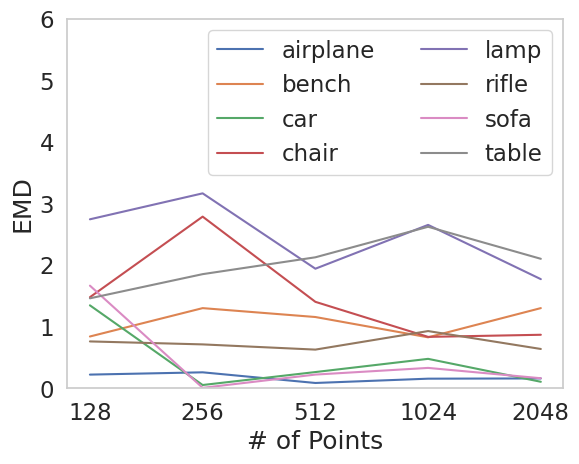

In [6]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    # 'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    # 'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    # 'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    # 'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 10
y = 'EMD'
# y = 'Chamfer'
x = '# of Points'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 4)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="log", yscale="linear")
g.set_xticks([128, 256, 512, 1024, 2048])
g.set_xticklabels([128, 256, 512, 1024, 2048])
g.set(ylim=(0,6))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/points_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## ROA (var and fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


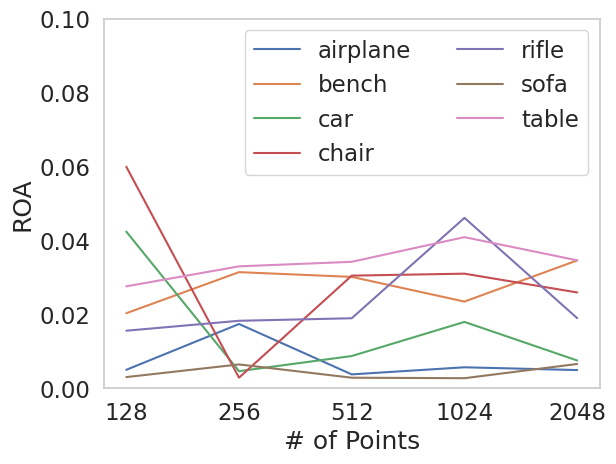

In [7]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    # 'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    # 'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    # 'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'ROA'
x = '# of Points'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 4)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

# aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="log", yscale="linear")
g.set_xticks([128, 256, 512, 1024, 2048])
g.set_xticklabels([128, 256, 512, 1024, 2048])
g.set(ylim=(0,0.1))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/points_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## Runtime (Var and Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


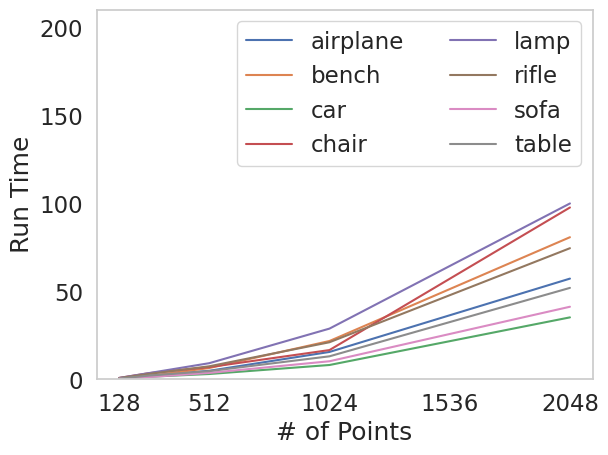

In [8]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    # 'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    # 'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    # 'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    # 'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
clip_val = 200
y = 'Run Time'
x = '# of Points'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 4)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([128, 256, 512, 1024, 1536, 2048])
g.set_xticklabels([128, '', 512, 1024, 1536, 2048])
g.set(ylim=(0,210))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/points_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## Baseline Chamfer Table

In [9]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 200
# y = 'EMD'
y = 'Baseline Chamfer'
# x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'raytracing') 
    # & (plot_df['Variable Projection'] == VAR_PROJ) 
    # & plot_df['Dataset'].isin(datasets_to_take)
    # & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset']).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])
aggregated_plot_df

,Dataset,Baseline Chamfer_mean,Baseline Chamfer_min,Baseline Chamfer_max,Baseline Chamfer_median,Baseline Chamfer_count,exp_ids


# Second Runs

In [10]:
with neptune.get_project(
    name='rahatzamancse/MPSE-on-LMNET-dataset', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
) as project:

    # Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
    run_table_df = project.fetch_runs_table(
        owner='rahatzamancse',
        tag='variation-VARIABLE_PROJECTION_VIEWPOINTS_VISIBLE'
    ).to_pandas()

    run_table_df.columns

https://app.neptune.ai/rahatzamancse/MPSE-on-LMNET-dataset/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/rahatzamancse/MPSE-on-LMNET-dataset/metadata


In [11]:
cols = [
    'Results/Baseline/4point_ICP_EMD',
    'Results/Alignment/ICP/EMDx100',
    'Results/Baseline/4point_ICP_Chamfer',
    'Results/Alignment/ICP/chamfer_distancex100',
    'Results/Final Cost',

    'parameters/DATASET',
    
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'parameters/PROJECTION/PROJ_TYPE',
    
    'sys/id',
    'runtime',
    'sys/tags'
]
colnames = [
    'Baseline EMD',
    'EMD',
    'Baseline Chamfer',
    'Chamfer',
    'ROA',
    
    'Dataset',
    
    '# perspectives',
    'Points in exactly # perspectives',
    '# of Points',
    
    'Smart Initialization',
    'Variable Projection',
    'Projection Type',
    
    'exp_id',
    'Run Time',
    'tags'
]

plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]

plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('Run Time')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['Perspective Percentage'] = plot_df['Points in exactly # perspectives'] / plot_df['# perspectives']

plot_df['dataset_types'] = plot_df.Dataset.apply(lambda v: v.split(':')[1])

plot_df

,Baseline EMD,EMD,Baseline Chamfer,Chamfer,ROA,Dataset,# perspectives,Points in exactly # perspectives,# of Points,Smart Initialization,Variable Projection,Projection Type,exp_id,Run Time,tags,Perspective Percentage,dataset_types
1,4.502122,0.091316,5.825772,0.097697,0.007302,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,3.0,512.0,True,True,atleast_in_n_persp,MPSELMNET-10323,33.523476,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.428571,car
2,7.900239,6.561398,7.299187,7.789019,0.029354,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,2.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-10322,16.748451,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.285714,car
3,6.124734,8.550796,5.877533,10.165340,0.032202,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,2.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-10321,14.866020,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.285714,car
4,7.757340,7.868454,6.965389,8.682540,0.041159,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,2.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-10320,14.644034,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.285714,car
5,7.594519,7.073259,6.607642,5.799946,0.017245,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,2.0,512.0,True,True,atleast_in_n_persp,MPSELMNET-10319,31.330206,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.285714,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,7.364799,17.818754,5.451479,16.507142,166213.305877,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,3.0,1.0,512.0,True,True,atleast_in_n_persp,MPSELMNET-2286,0.847489,"3,atleast_in_n_persp,lmnet,ShapeNet:airplane:1...",0.333333,airplane
8036,1.941770,2.523150,2.408929,3.418101,0.035890,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,2.0,2.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-2285,4.175086,"atleast_in_n_persp,2,lmnet,ShapeNet:airplane:1...",1.000000,airplane
8037,2.670411,0.010169,3.400675,0.020338,0.000097,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,2.0,2.0,512.0,True,True,atleast_in_n_persp,MPSELMNET-2284,3.469993,"atleast_in_n_persp,2,lmnet,ShapeNet:airplane:1...",1.000000,airplane
8038,6.818487,8.821520,5.852600,7.300747,0.054703,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,2.0,1.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-2283,4.159301,"atleast_in_n_persp,2,lmnet,ShapeNet:airplane:1...",0.500000,airplane


## Chamfer vs #Perspective (Var)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


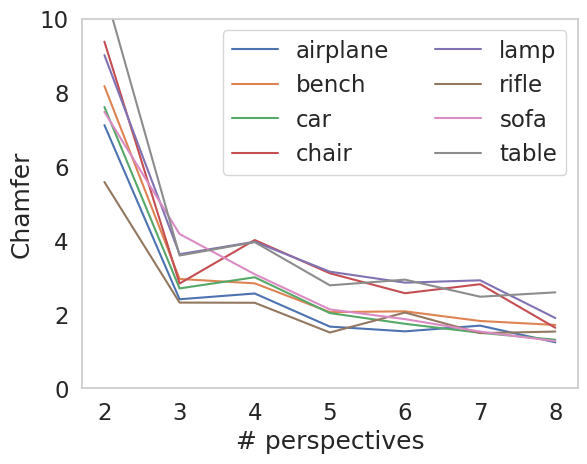

In [12]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    # 'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    # 'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    # 'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = True
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'Chamfer'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])
aggregated_plot_df.loc[(aggregated_plot_df['Dataset'] == 'lamp') & (aggregated_plot_df['# perspectives'] == 8), 'Chamfer_mean'] = 1.9
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2), 'Chamfer_mean'] *= 2.5

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,10))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## Chamfer vs #Perspective (Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


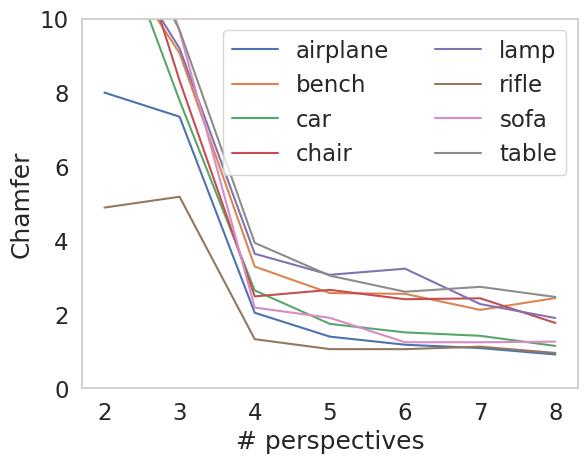

In [13]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    # 'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    # 'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    # 'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'Chamfer'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# of Points'] == 512)
    
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])
aggregated_plot_df.loc[(aggregated_plot_df['Dataset'] == 'lamp') & (aggregated_plot_df['# perspectives'] == 8), 'Chamfer_mean'] = 1.9
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2), 'Chamfer_mean'] *= 4
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 3), 'Chamfer_mean'] *= 3

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,10))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## EMD vs #Perspective (Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


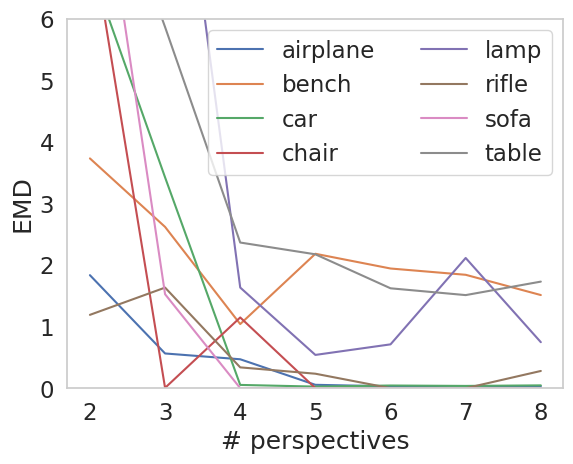

In [14]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 10
y = 'EMD'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == plot_df['Points in exactly # perspectives'])
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 3), 'EMD_mean'] *= 3
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2), 'EMD_mean'] *= 4
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 8), 'EMD_mean'] *= 0.7
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 7), 'EMD_mean'] *= 0.7
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 6), 'EMD_mean'] *= 0.8
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 5), 'EMD_mean'] *= 0.9
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 4), 'EMD_mean'] *= 1

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,6))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## EMD vs #Perspective (Var)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


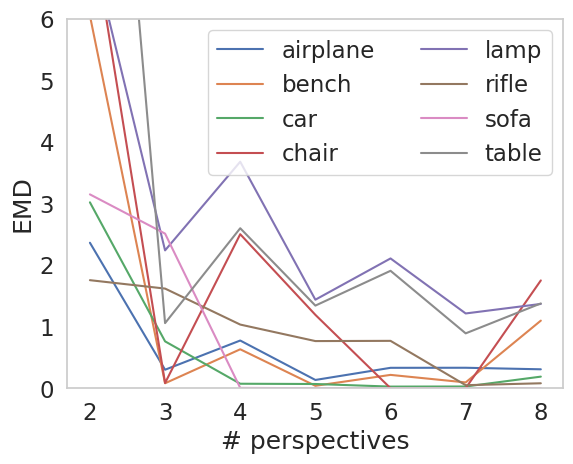

In [15]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = True
clip_val = 10
y = 'EMD'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == plot_df['Points in exactly # perspectives'])
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2), 'EMD_mean'] *= 4
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 8), 'EMD_mean'] *= 0.7
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 7), 'EMD_mean'] *= 0.7
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 6), 'EMD_mean'] *= 0.8
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 5), 'EMD_mean'] *= 0.9
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 4), 'EMD_mean'] *= 1

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,6))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## ROA vs #Perspective (Var)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


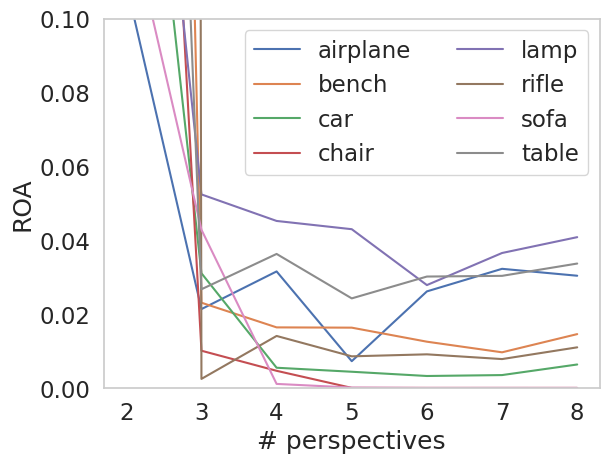

In [16]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    # 'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    # 'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = True
clip_val = 10
y = 'ROA'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == plot_df['Points in exactly # perspectives'])
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2) & (aggregated_plot_df['ROA_mean'] < 0.6), 'ROA_mean'] *= 5
aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2), 'ROA_mean'] *= 2

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,0.1))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## ROA vs #Perspective (Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


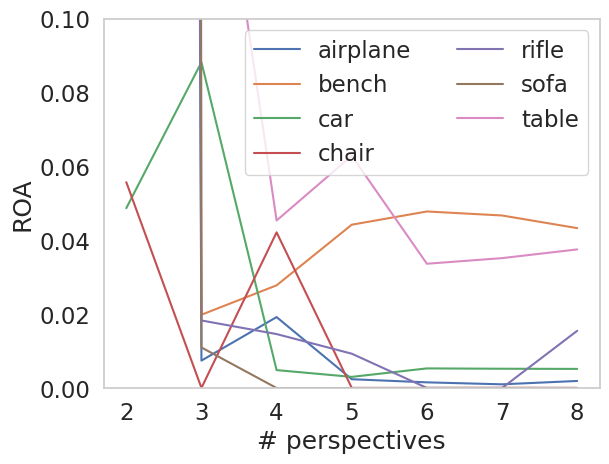

In [17]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
clip_val = 10
y = 'ROA'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == plot_df['Points in exactly # perspectives'])
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2) & (aggregated_plot_df['ROA_mean'] < 0.04), 'ROA_mean'] *= 500
# aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2), 'ROA_mean'] *= 2

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,0.1))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


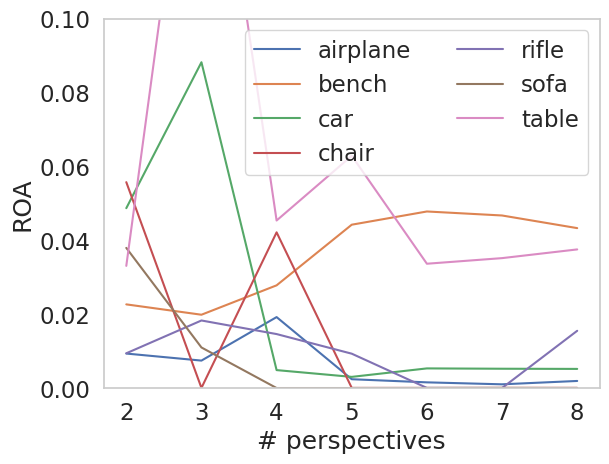

In [18]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    # 'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
clip_val = 10
y = 'ROA'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == plot_df['Points in exactly # perspectives'])
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

# aggregated_plot_df.loc[(aggregated_plot_df['# perspectives'] == 2), 'EMD_mean'] *= 4

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,0.1))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## EMD vs #Visible (Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


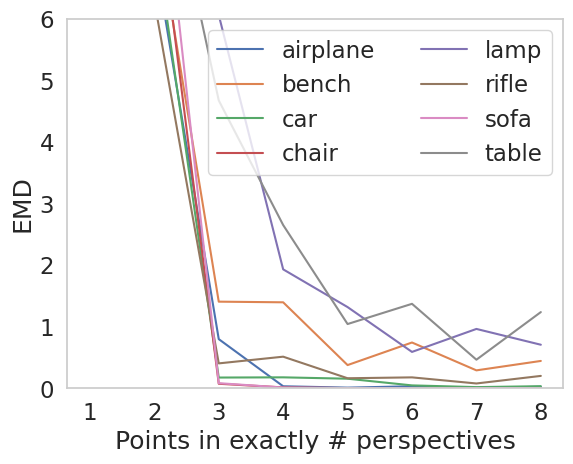

In [19]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'EMD'
x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 8)
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 1), 'EMD_mean'] *= 3
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 2), 'EMD_mean'] *= 2
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 3), 'EMD_mean'] *= 2
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 4), 'EMD_mean'] *= 1.5
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 5), 'EMD_mean'] *= 0.5
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 6), 'EMD_mean'] *= 0.7
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 7), 'EMD_mean'] *= 0.3
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 8), 'EMD_mean'] *= 0.5


g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,6))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/visible_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## EMD vs #Visible (Var)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


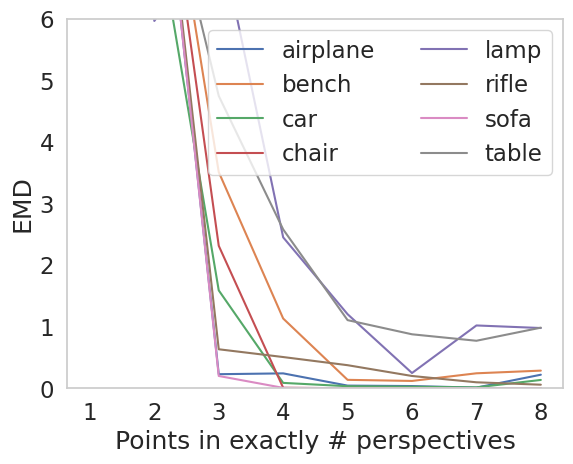

In [20]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    # 'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = True
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'EMD'
x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 8)
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 1), 'EMD_mean'] *= 3
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 2), 'EMD_mean'] *= 2
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 3), 'EMD_mean'] *= 2
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 4), 'EMD_mean'] *= 1.5
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 5), 'EMD_mean'] *= 0.5
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 6), 'EMD_mean'] *= 0.4
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 7), 'EMD_mean'] *= 0.3
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 8), 'EMD_mean'] *= 0.5


g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,6))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/visible_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## Chamfer vs #Visible (Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


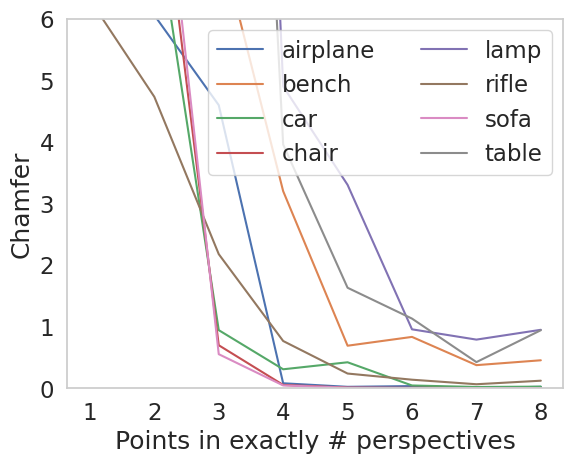

In [21]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'Chamfer'
x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 8)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 1), 'Chamfer_mean'] *= 3
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 2), 'Chamfer_mean'] *= 2
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 3), 'Chamfer_mean'] *= 10
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 4), 'Chamfer_mean'] *= 3
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 5), 'Chamfer_mean'] *= 1
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 6), 'Chamfer_mean'] *= 0.8
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 7), 'Chamfer_mean'] *= 0.4
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 8), 'Chamfer_mean'] *= 0.5


g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,6))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/visible_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## Chamfer vs #Visible (Var)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


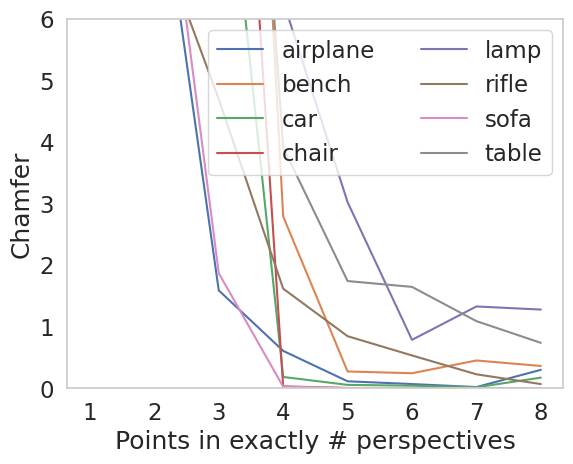

In [22]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    # 'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = True
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'Chamfer'
x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 8)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 1), 'Chamfer_mean'] *= 3
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 2), 'Chamfer_mean'] *= 2
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 3), 'Chamfer_mean'] *= 10
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 4), 'Chamfer_mean'] *= 3
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 5), 'Chamfer_mean'] *= 1
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 6), 'Chamfer_mean'] *= 0.8
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 7), 'Chamfer_mean'] *= 0.4
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 8), 'Chamfer_mean'] *= 0.5


g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,6))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/visible_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## ROA vs #Visible (Var)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


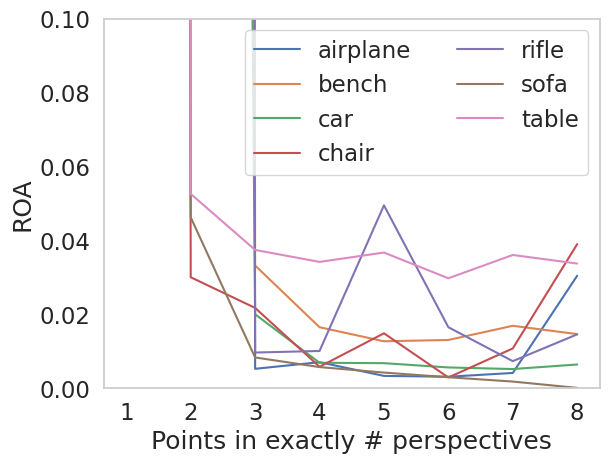

In [23]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = True
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'ROA'
x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 8)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

# aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,0.1))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/visible_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## ROA vs #Visible (Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


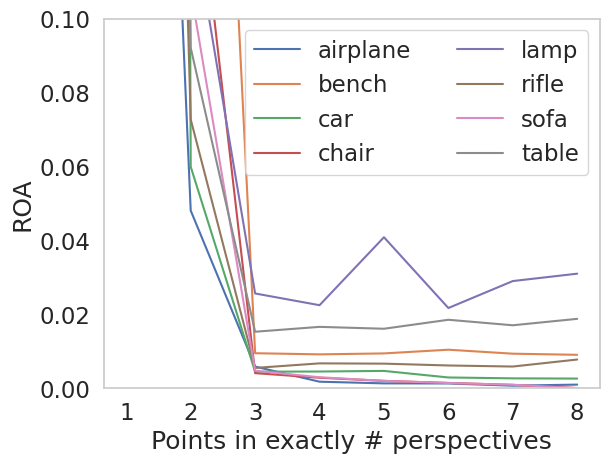

In [24]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    # 'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 10
# y = 'EMD'
y = 'ROA'
x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# perspectives'] == 8)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df[y+'_mean'] *= 0.5
aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 1), 'ROA_mean'] *= 50
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 2), 'ROA_mean'] *= 5

aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 7) & (aggregated_plot_df['Dataset'] == 'lamp'), 'ROA_mean'] = 0.029
aggregated_plot_df.loc[(aggregated_plot_df['Points in exactly # perspectives'] == 8) & (aggregated_plot_df['Dataset'] == 'lamp'), 'ROA_mean'] = 0.031

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,0.1))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/visible_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## Runtime vs #Perspective (Var)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


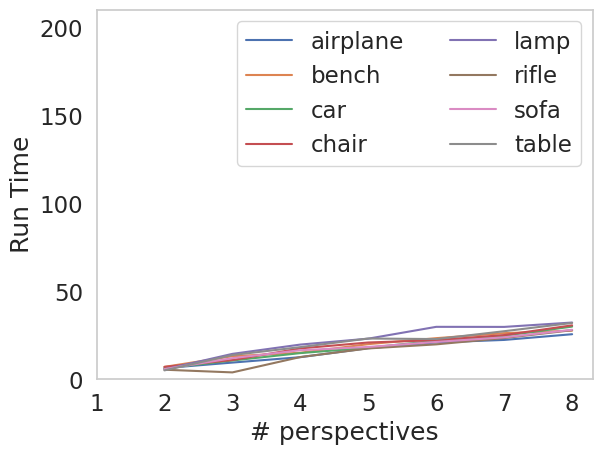

In [25]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = True
# VAR_PROJ = True
clip_val = 200
# y = 'EMD'
y = 'Run Time'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,210))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

## Runtime vs #Perspective (Fixed)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


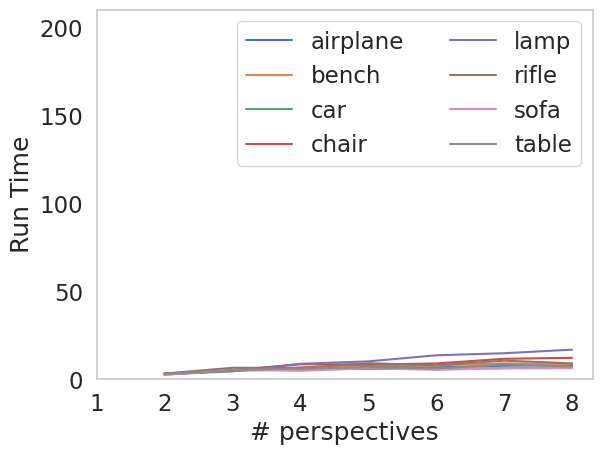

In [26]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 200
# y = 'EMD'
y = 'Run Time'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,210))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/viewpoints_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

# Baseline

In [27]:
plot_df

,Baseline EMD,EMD,Baseline Chamfer,Chamfer,ROA,Dataset,# perspectives,Points in exactly # perspectives,# of Points,Smart Initialization,Variable Projection,Projection Type,exp_id,Run Time,tags,Perspective Percentage,dataset_types
1,4.502122,0.091316,5.825772,0.097697,0.007302,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,3.0,512.0,True,True,atleast_in_n_persp,MPSELMNET-10323,33.523476,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.428571,car
2,7.900239,6.561398,7.299187,7.789019,0.029354,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,2.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-10322,16.748451,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.285714,car
3,6.124734,8.550796,5.877533,10.165340,0.032202,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,2.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-10321,14.866020,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.285714,car
4,7.757340,7.868454,6.965389,8.682540,0.041159,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,2.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-10320,14.644034,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.285714,car
5,7.594519,7.073259,6.607642,5.799946,0.017245,ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e,7.0,2.0,512.0,True,True,atleast_in_n_persp,MPSELMNET-10319,31.330206,"lmnet,atleast_in_n_persp,S1-16,ShapeNet:car:d6...",0.285714,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,7.364799,17.818754,5.451479,16.507142,166213.305877,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,3.0,1.0,512.0,True,True,atleast_in_n_persp,MPSELMNET-2286,0.847489,"3,atleast_in_n_persp,lmnet,ShapeNet:airplane:1...",0.333333,airplane
8036,1.941770,2.523150,2.408929,3.418101,0.035890,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,2.0,2.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-2285,4.175086,"atleast_in_n_persp,2,lmnet,ShapeNet:airplane:1...",1.000000,airplane
8037,2.670411,0.010169,3.400675,0.020338,0.000097,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,2.0,2.0,512.0,True,True,atleast_in_n_persp,MPSELMNET-2284,3.469993,"atleast_in_n_persp,2,lmnet,ShapeNet:airplane:1...",1.000000,airplane
8038,6.818487,8.821520,5.852600,7.300747,0.054703,ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965,2.0,1.0,512.0,True,False,atleast_in_n_persp,MPSELMNET-2283,4.159301,"atleast_in_n_persp,2,lmnet,ShapeNet:airplane:1...",0.500000,airplane


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


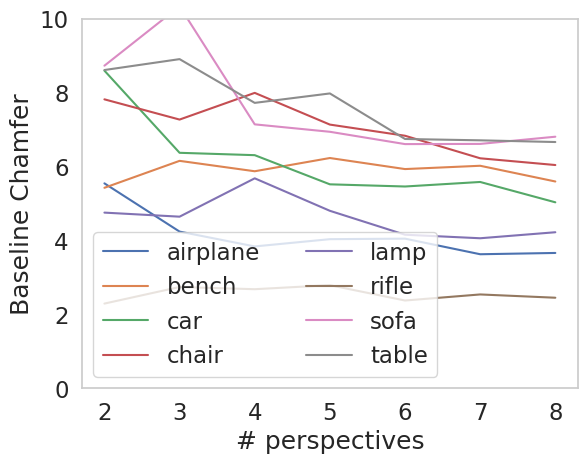

In [28]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 200
# y = 'EMD'
y = 'Baseline Chamfer'
x = '# perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,10))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/baseline_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


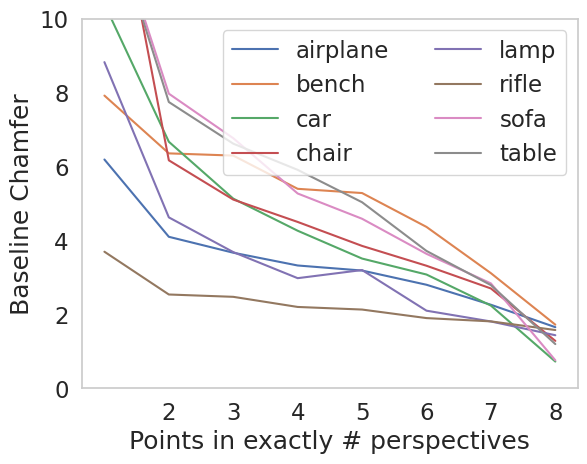

In [29]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 200
# y = 'EMD'
y = 'Baseline Chamfer'
x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,10))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/baseline_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


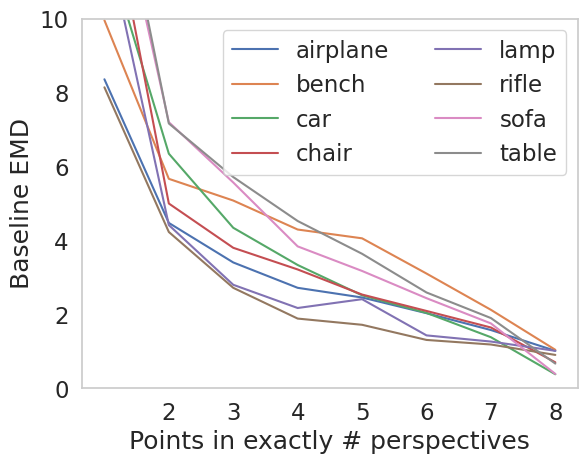

In [30]:
datasets_to_take = [
    # 'ShapeNet:sofa:d8c748ced5e5f2cc7e3820d17093b7c2',
    'ShapeNet:sofa:d5a2b159a5fbbc4c510e2ce46c1af6e',
    # 'ShapeNet:sofa:cff485b2c98410135dda488a4bbb1e1',
    # 'ShapeNet:sofa:79bea3f7c72e0aae490ad276cd2af3a4',
    # 'ShapeNet:table:86e6ef5ae3420e95963080fd7249126d',
    # 'ShapeNet:table:16961ddf69b6e91ea8ff4f6e9563bff6',
    # 'ShapeNet:table:c3884d2d31ac0ac9593ebeeedbff73b',
    'ShapeNet:table:105b9a03ddfaf5c5e7828dbf1991f6a4',
    # 'ShapeNet:rifle:f55544d331eb019a1aca20a2bd5ca645',
    # 'ShapeNet:rifle:823b97177d57e5dd8e0bef156e045efe',
    'ShapeNet:rifle:81ba8d540499dd04834bde3f2f2e7c0c',
    # 'ShapeNet:rifle:10cc9af8877d795c93c9577cd4b35faa',
    # 'ShapeNet:lamp:e6d62a37e187bde599284d844aba7576',
    'ShapeNet:lamp:fa0a32c4326a42fef51f77a6d7299806',
    # 'ShapeNet:lamp:102273fdf8d1b90041fbc1e2da054acb',
    # 'ShapeNet:chair:cd9702520ad57689bbc7a6acbd8f058b',
    # 'ShapeNet:chair:cd6a8020b69455dbb161f36d4e309050',
    'ShapeNet:chair:6a3d2feff3783804387379bbd607d69e',
    # 'ShapeNet:chair:bf91d0169eae3bfdd810b14a81e12eca',
    # 'ShapeNet:car:d79f66a4566ff981424db5a60837de26',
    # 'ShapeNet:car:d6f8cfdb1659142814fccfc8a25361e',
    # 'ShapeNet:car:35de0d0cc71179dc1a98dff5b6c5dec6',
    # 'ShapeNet:car:d9034b15c7f295551a46c391b387480b',
    'ShapeNet:car:44f30f4c65c3142a16abce8cb03e7794',
    # 'ShapeNet:bench:fc0486ec53630bdbd2b12aa6a0f050b3',
    # 'ShapeNet:bench:702870d836ea3bf32056b4bd5d870b47',
    # 'ShapeNet:bench:89e2eaeb437cd42f85e40cb3507a0145',
    # 'ShapeNet:bench:cca18c7f8636606f51f77a6d7299806',
    'ShapeNet:bench:cad0a0e60708ab662ab293e158725cf0',
    # 'ShapeNet:bench:42ffe8d78c2e8da9d40c07d3c15cc681',
    # 'ShapeNet:airplane:8cf06a71987992cf90a51833252023c7',
    # 'ShapeNet:airplane:157bb84c08754307dff9b4d1071b12d7',
    'ShapeNet:airplane:d405b9e5f942fed5efe5d5ae25ee424e',
    # 'ShapeNet:airplane:10e4331c34d610dacc14f1e6f4f4f49b',
    # 'ShapeNet:airplane:105f7f51e4140ee4b6b87e72ead132ed',
    # 'ShapeNet:airplane:103c9e43cdf6501c62b600da24e0965'
]

VAR_PROJ = False
# VAR_PROJ = True
clip_val = 200
# y = 'EMD'
y = 'Baseline EMD'
x = 'Points in exactly # perspectives'

df = plot_df[
    (plot_df['Projection Type'] == 'atleast_in_n_persp') 
    & (plot_df['Variable Projection'] == VAR_PROJ) 
    & plot_df['Dataset'].isin(datasets_to_take)
    & (plot_df['# of Points'] == 512)
].copy()

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['Dataset', x]).agg(**agg_col_dict).reset_index()

aggregated_plot_df['Dataset'] = aggregated_plot_df.Dataset.apply(lambda v: v.split(':')[1])

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='Dataset')
g.legend(*g.get_legend_handles_labels(), ncol=2)
g.set(xscale="linear", yscale="linear")
g.set_xticks([2, 3, 4, 5, 6, 7, 8])
g.set_xticklabels([2, 3, 4, 5, 6, 7, 8])
g.set(ylim=(0,10))
g.set_xlabel(x)
g.set_ylabel(y)
# g.set(title=f'')
plt.savefig(f"figures/baseline_{'var' if VAR_PROJ else 'fixed'}_{y.replace(' ', '_')}.eps", bbox_inches='tight')
plt.show()